## Evaluating Cluster Distribution For Runners From Great Britain, Germany, Mexico, and Italy

This notebook explores the distribution of runners from 4 different countries using a K-means clustering approach, using data taken from the 2013 Boston Marathon. The dataset contains information regarding various splits for each runner, such as their times for 5k, 10k, 20k, etc. This notebook will use the runner's finish time, in the dataset titled 'Official', and their 5k time to perform clustering.

In [173]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

marathon_df = pd.read_csv('results.csv')

In [174]:
marathon_df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [175]:
marathon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


In [176]:
marathon_df.isnull().sum()

10k              0
name             0
division         0
25k              0
gender           0
age              0
official         0
bib              0
genderdiv        0
ctz          30740
35k              0
overall          0
pace             0
state         2576
30k              0
5k               0
half             0
20k              0
country          0
city             1
40k              0
dtype: int64

In [177]:
# Drop the name column as that is not useful for this Challenge and remove CTZ as it's mostly blank.
marathon_df = marathon_df.drop(columns =['name','ctz'])
# Replace remaining null values in State and City to 'NA'
marathon_df = marathon_df.fillna('NA')

In [178]:
# Dealing with string values in the 5k column
marathon_df[marathon_df['5k'] == '-'].shape[0]

52

In [179]:
# Converting to naan and dropping the rows 
marathon_df['5k'] = marathon_df['5k'].replace('-',np.nan)
marathon_df = marathon_df.dropna()
marathon_df.isnull().sum()


10k          0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
state        0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

In [180]:
marathon_df['country'].value_counts()

USA    27189
CAN     2171
GBR      346
ITA      211
MEX      205
GER      182
JPN      175
AUS      124
IRL      119
FRA      115
ESP       88
BRA       86
SWE       66
SUI       62
KOR       60
NED       54
HKG       53
DEN       50
CHN       42
COL       40
CHI       29
FIN       28
ISL       28
BEL       27
SIN       23
AUT       21
NOR       21
RSA       19
VEN       19
RUS       18
       ...  
PHI        4
MAS        4
LUX        4
TUR        4
DOM        3
UKR        3
ECU        3
PAN        3
HUN        3
ROU        2
EGY        2
THA        2
BAH        2
ESA        2
QAT        2
BOL        1
BRN        1
TRI        1
ZIM        1
CAY        1
TAN        1
VGB        1
INA        1
URU        1
BAR        1
BLR        1
EST        1
CRO        1
MAR        1
LIE        1
Name: country, Length: 78, dtype: int64

In [181]:
# Creating Dataframes for each Country
gbr_df = marathon_df[marathon_df.country =='GBR']
ita_df = marathon_df[marathon_df.country =='ITA']
ger_df = marathon_df[marathon_df.country =='GER']
mex_df = marathon_df[marathon_df.country =='MEX']

#Creating DataFrames based on the 5k and official times for each runner
gbr2_df = gbr_df[['5k','official']].copy()
ita2_df = ita_df[['5k','official']].copy()
ger2_df = ger_df[['5k','official']].copy()
mex2_df = mex_df[['5k','official']].copy()

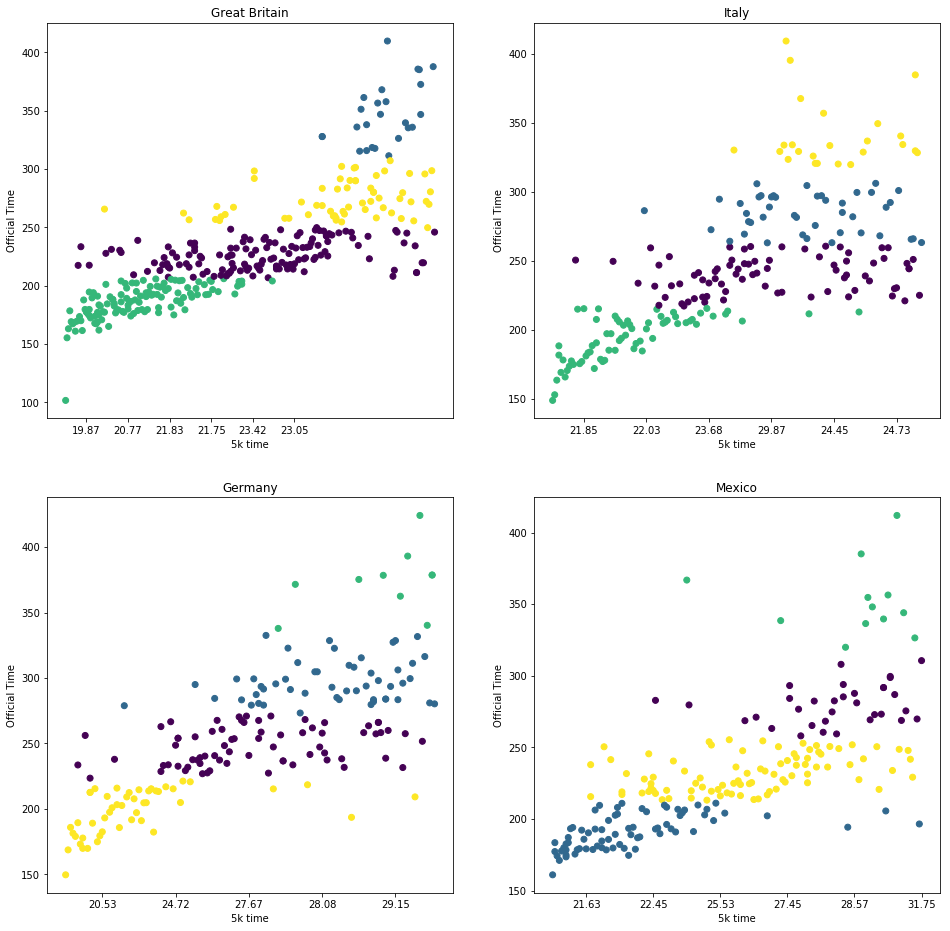

In [182]:
# KMeans Clustering 
# After trial and error, 4 clusters was selected for n_clusters
y_gbr = KMeans(n_clusters=4, random_state=0).fit_predict(gbr2_df)
y_ita = KMeans(n_clusters=4, random_state=0).fit_predict(ita2_df)
y_ger = KMeans(n_clusters=4, random_state=0).fit_predict(ger2_df)
y_mex = KMeans(n_clusters=4, random_state=0).fit_predict(mex2_df)

# Plot the solution.
fig = plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.title('Great Britain')
plt.xlabel('5k time')
plt.ylabel('Official Time')
plt.xticks(np.arange(15, 175, step=30))
plt.scatter(gbr2_df['5k'], gbr2_df['official'], c=y_gbr)

plt.subplot(2,2,2)
plt.title('Italy')
plt.xlabel('5k time')
plt.ylabel('Official Time')
plt.xticks(np.arange(15, 175, step=30))
plt.scatter(ita2_df['5k'], ita2_df['official'], c=y_ita)

plt.subplot(2,2,3)
plt.title('Germany')
plt.xlabel('5k time')
plt.ylabel('Official Time')
plt.xticks(np.arange(15, 175, step=30))
plt.scatter(ger2_df['5k'], ger2_df['official'], c=y_ger)

plt.subplot(2,2,4)
plt.title('Mexico')
plt.xlabel('5k time')
plt.ylabel('Official Time')
plt.xticks(np.arange(15, 175, step=30))
plt.scatter(mex2_df['5k'], mex2_df['official'], c=y_mex)
plt.show()


In [183]:
#Retrieving the counts from each cluster and storing in an array
unique, counts = np.unique(y_gbr, return_counts=True)
gbr_arr = np.asarray((unique,counts)).T
unique, counts = np.unique(y_mex, return_counts=True)
mex_arr = np.asarray((unique,counts)).T
unique, counts = np.unique(y_ger, return_counts=True)
ger_arr = np.asarray((unique,counts)).T
unique, counts = np.unique(y_ita, return_counts=True)
ita_arr = np.asarray((unique,counts)).T

#Creating a Dataframe for the cluster data from the arrays
dataset = pd.DataFrame({ 'Great Britain': gbr_arr[:, 1],'Mexico': mex_arr[:,1],'Germany':ger_arr[:,1],'Italy':ita_arr[:,1]})
dataset.loc['Total'] = dataset.sum(numeric_only=True)

#countries = ['Great Britain','Mexico','Germany','Italy']
#for country in countries:
    #dataset.loc['25% Percentile'] = dataset['country'][0] / dataset['country']['Total']
    #dataset.loc['50% Percentile'] = dataset['country'][1] / dataset['country']['Total']
    #dataset.loc['75% Percentile'] = dataset['country'][2] / dataset['country']['Total']
    #dataset.loc['100% Percentile'] = dataset['country'][3] / dataset['country']['Total']

dataset.head(10)

,Great Britain,Mexico,Germany,Italy
0,138,33,71,76
1,25,73,52,43
2,122,12,10,68
3,61,87,49,24
Total,346,205,182,211


<Figure size 1152x1152 with 0 Axes>

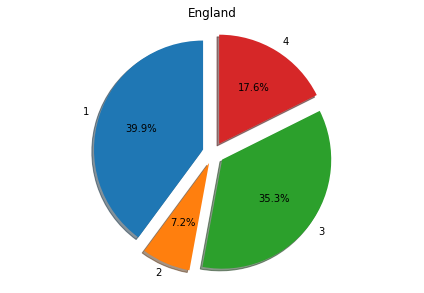

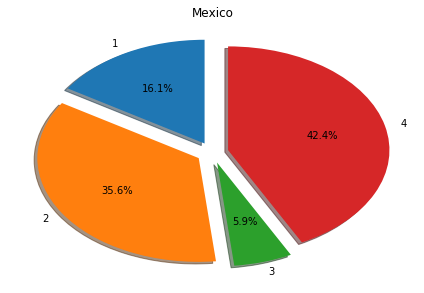

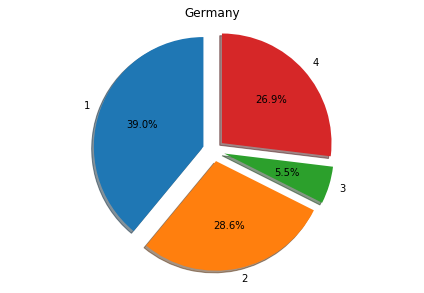

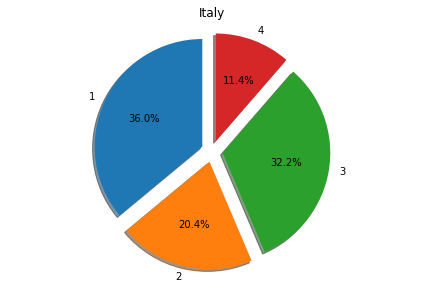

In [184]:

# Pie charts for the different countries
plt.figure(figsize=(16,16))
labels = ['1', '2', '3', '4']
sizes = [138/346, 25/346, 122/346, 61/346]
explode = (0.1, 0.1, 0.1, 0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('England')

sizes = [33/205, 73/205, 12/205, 87/205]
explode = (0.1, 0.1, 0.1, 0.1)
fig2, ax2 = plt.subplots()
ax2.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Mexico')


sizes = [71/182, 52/182, 10/182, 49/182]
explode = (0.1, 0.1, 0.1, 0.1)
fig3, ax3 = plt.subplots()
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax3.axis('equal')  
plt.tight_layout()
plt.title('Germany')

sizes = [76/211, 43/211, 68/211, 24/211]
explode = (0.1, 0.1, 0.1, 0.1)  
fig4, ax4 = plt.subplots()
ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax4.axis('equal')  
plt.tight_layout()
plt.title('Italy')
plt.show()

Pie Charts illustrate the distribution of clusters for the Great Britain, Germany, Italy, and Mexico runners. It's interesting to note that England was dominated by the 1st and 3rd clusters, whereas Mexico showed the opposite trend with more data points falling in clusters 2 and 4. Germany had almost no runners in the 3rd cluster, with the rest of the data fairly evenly distributed between 1, 2, and 4.  Italy was also fairly evenly distributed between 1, 2, and 3, with it's fewest points in Cluster 4. It's interesting to note that there appears to be no similarities between these charts!